In [ ]:
#!/usr/bin/env python3

# Copyright (C) 2022 Tobias Westphal <tobias.westphal@haw-hamburg.de>
#
# This file is subject to the terms and conditions of the GNU Lesser
# General Public License v2.1. See the file LICENSE in the top level
# directory for more details.

In [7]:
import numpy as np; np.random.seed(0)
import seaborn as sns;
import csv
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
from matplotlib import gridspec
from random import shuffle
import pandas as pd
import os
curr_wd = os.getcwd() + "/"
print(curr_wd)

path = '../RiotClockConf/cpu/'

/home/tobi/RIOT_ARBEIT/ba_abgabe_repo/Measurement_Utils/


In [4]:
def get_boards(path_cpu_str : str, cpu_str : str, path_boards_str : str) -> list:
    # Find all CPU models/line/families that are corelated with the should_contain list
    # Should be run multiple times ... or use automate functionality
    CONTAIN_FILTER = ["CPU_FAM", "CPU", "CPU_MODEL"]
    correlated_configs = []
    last_correlated_configs_len = 0
    temp_config = ""
    for i in range(10):
        for (dirpath, _dirnames, path_files) in os.walk(path_cpu_str):
            try:
                for p_file in path_files:
                    if p_file.find("Kconfig") != -1:

                        with open(dirpath + "/" + p_file) as file:
                            for line in file:
                                words = line.split()
                                for i in range(len(words)):
                                    if words[i] == "config" and (words[i+1] not in CONTAIN_FILTER):
                                        temp_config = words[i+1]
                                        continue
                                    elif (temp_config not in correlated_configs) and (words[i] == cpu_str or words[i] in correlated_configs):
                                        correlated_configs.append(temp_config)
                                        temp_config = ""
            except:
                #exceptions += 1
                continue

        # To automatically run script multiple times
        if len(correlated_configs) == last_correlated_configs_len:
            break
        else:
            last_correlated_configs_len = len(correlated_configs)
        
    # Find all Boards that are corelated with the previous cells CPU models/lines/families
    # Uses correlated_configs
    correlated_boards = []
    temp_board = ""

    for (dirpath, dirnames, filenames) in os.walk(path_boards_str):
        try:
            with open(dirpath + "/Kconfig") as file:
                for line in file:
                    words = line.split()
                    for i in range(len(words)):
                        if words[i] == "config":
                            temp_board = words[i+1]
                        elif words[i] in correlated_configs and (temp_board not in correlated_boards):
                            correlated_boards.append(temp_board)
                            temp_board = ""
        except:
            #exceptions += 1
            continue

    return correlated_boards


def get_all_boards(path_boards_str : str) -> list:
    all_boards = []

    for (dirpath, dirnames, filenames) in os.walk(path_boards_str):
        try:
            with open(dirpath + "/Kconfig") as file:
                for line in file:
                    words = line.split()
                    for i in range(len(words)):
                        if words[i] == "config" and words[i+1].find("BOARD") != -1 and (words[i+1] not in all_boards):
                            all_boards.append(words[i+1])
        except:
            #exceptions += 1
            continue
    
    return all_boards
    

In [6]:
CONTAIN_CPU_BASE = ["CPU_CORE_CORTEX_M3", "CPU_CORE_CORTEX_M4", "CPU_CORE_CORTEX_M4F", "CPU_CORE_CORTEX_M7", "CPU_CORE_CORTEX_M33"] # "CPU_ARCH_ARMV7M", "CPU_ARCH_ARMV8M", "CPU_CORE_CORTEX_M23"
#CONTAIN_CPU_BASE = ["CPU_ARCH_ARMV7M", "CPU_ARCH_ARMV8M"] # "CPU_ARCH_ARMV7M", "CPU_ARCH_ARMV8M", "CPU_CORE_CORTEX_M23"
#CONTAIN_CPU_BASE = ["CPU_CORE_CORTEX_M4F"] # "CPU_ARCH_ARMV7M", "CPU_ARCH_ARMV8M", "CPU_CORE_CORTEX_M23"

PATH_CPUS = '../RiotClockConf/cpu/'
PATH_BOARDS = '../RiotClockConf/boards/'

cortex_m_boards_amount = []

for x in range(len(CONTAIN_CPU_BASE)):
    #print(x)
    boards = get_boards(PATH_CPUS, CONTAIN_CPU_BASE[x], PATH_BOARDS)
    print(boards)
    cortex_m_boards_amount.append(len(boards))

    if "BOARD_NUCLEO_L476RG" in boards: print("BOARD_NUCLEO_L476RG Found in ", x)

# BOARD_FILTER = "ERROR"

# for index, bs in enumerate(cortex_m_boards_amount):
#     temp_bs = []
#     cortex_m_boards_amount[index] = filter(lambda board: BOARD_FILTER not in board, bs)


print(cortex_m_boards_amount)
#print(boards)


all_boards = get_all_boards(PATH_BOARDS)
print(len(all_boards))

['BOARD_MCB2388', 'BOARD_NUCLEO_F767ZI', 'BOARD_LSN50', 'BOARD_NUCLEO_L552ZE_Q', 'BOARD_ESP32_ETHERNET_KIT_V1_2', 'BOARD_NUCLEO_G431RB', 'BOARD_IM880B', 'BOARD_NUCLEO_G070RB', 'BOARD_NUCLEO_L4R5ZI', 'BOARD_ESP8266_ESP_12X', 'BOARD_P_NUCLEO_WB55', 'BOARD_HIFIVE1', 'BOARD_NUCLEO_F303ZE', 'BOARD_NUCLE0_L152RE', 'BOARD_NUCLEO_L496ZG', 'BOARD_NUCLEO_F070RB', 'BOARD_OMOTE', 'BOARD_WEACT_F411CE', 'BOARD_LIMIFROG_V1', 'BOARD_NUCLEO_L433RC', 'BOARD_STM32F769I_DISCO', 'BOARD_NUCLEO_F429ZI', 'BOARD_NUCLEO_F103RB', 'BOARD_NUCLEO_L412KB', 'BOARD_NUCLEO_G071RB', 'BOARD_B_L072Z_LRWAN1', 'BOARD_NUCLEO_F030R8', 'BOARD_ESP32_OLIMEX_EVB', 'BOARD_F4VI1', 'BOARD_NUCLEO_F401RE', 'BOARD_FOX', 'BOARD_ESP32_WEMOS_LOLIN_D32_PRO', 'BOARD_NUCLEO_F446RE', 'BOARD_ESP8266_OLIMEX_MOD', 'BOARD_ESP32_ETHERNET_KIT_V1_1', 'BOARD_BLACKPILL_128KIB', 'BOARD_NUCLEO_F091RC', 'BOARD_ESP8266_SPARKFUN_THING', 'BOARD_OPENMOTE_CC2538', 'BOARD_NUCLEO_F302R8', 'BOARD_STM32F723E_DISCO', 'BOARD_NUCLEO_L031K6', 'BOARD_CC1350_LAUNCHPAD'

133


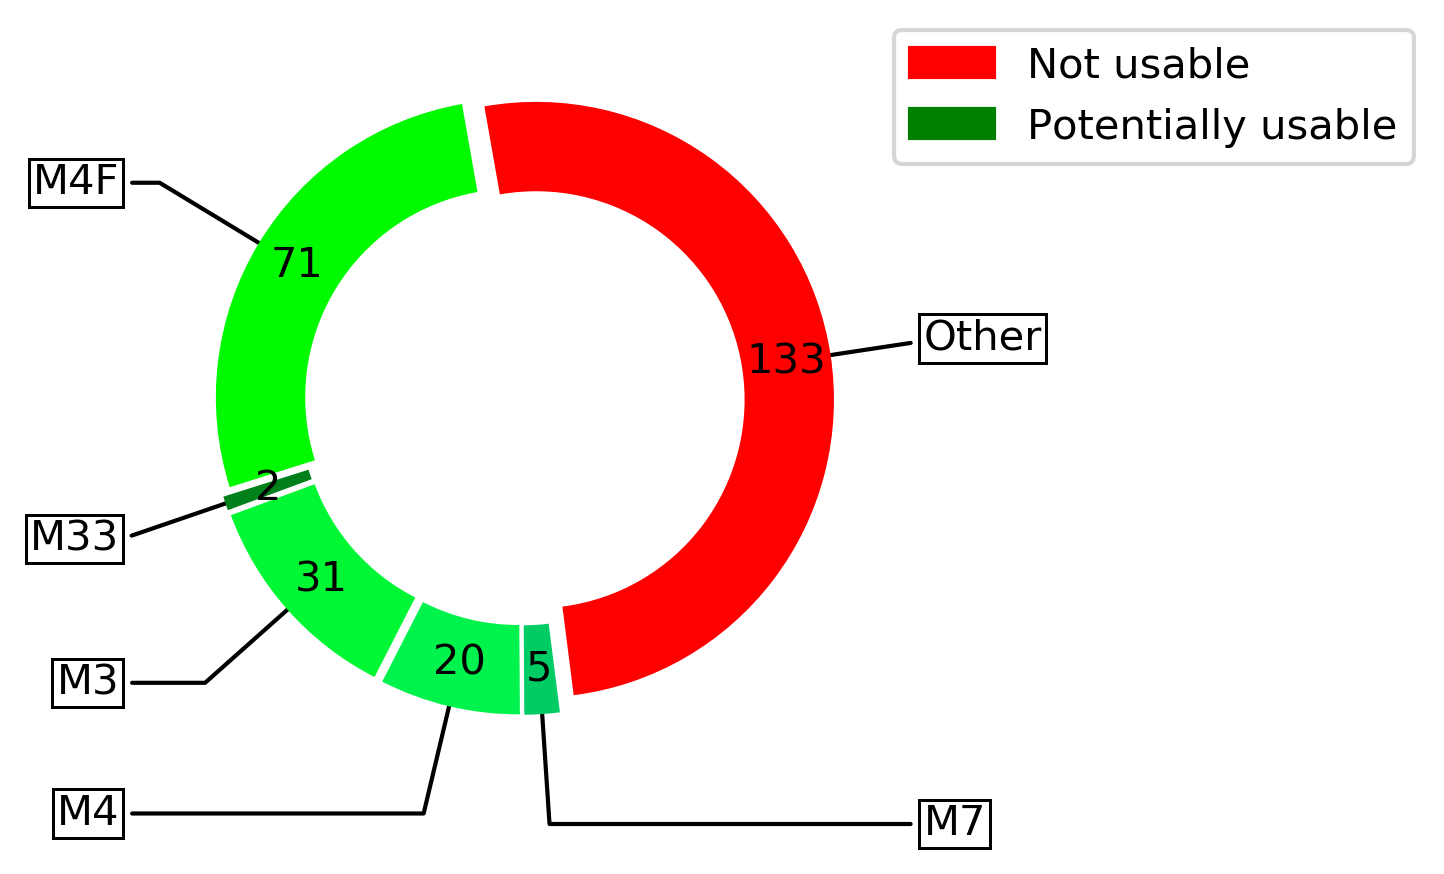

In [21]:
labels = ['Not usable', 'Potentially Usable']
sizes = [len(all_boards) - sum(cortex_m_boards_amount)]
colors = []
labels = ['Other']
explode = [0.03]

for i in range(len(cortex_m_boards_amount)):
    sizes.append(cortex_m_boards_amount[i])
    labels.append((CONTAIN_CPU_BASE[i]).split('_')[-1]) # list[-1] gets the last element
    explode.append(0.05)

data = pd.DataFrame({'labels':labels, 'sizes':sizes})
data = data.sample(frac=1).reset_index(drop=True)
sizes = data['sizes'].values.tolist()
labels = data['labels'].values.tolist()


for i in range(len(sizes)):
    if sizes[i] == max(sizes):
        print(sizes[i])
        colors.append((1, 0, 0))
    else:
        colors.append((0, 1 - 1/sizes[i], 0.1*i))
#print(data['names'].values.tolist())

#shuffle(sizes)

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

#plt.figure(dpi=600)

fig, ax = plt.subplots(figsize=(6, 3), dpi=300, subplot_kw=dict(aspect="equal"))

wedges, texts, _autotext = ax.pie(sizes,
    startangle=100,
    colors=colors, 
    shadow=False, 
    explode=tuple(explode), 
    wedgeprops=dict(width=0.3),
    #labels=labels, # the outer labels
    autopct=lambda p: '{:.0f}'.format(round((p/100)*len(all_boards))), # the numbers
    #textprops=dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72),
    pctdistance=0.85) # brings the inner number more outside

bbox_props = dict(boxstyle="square,pad=0.1", facecolor="w", edgecolor="k", linewidth=0.72, clip_on=False)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    #kw["bbox"].update({"height": 0.1})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.42*y),
                horizontalalignment=horizontalalignment, **kw)

# Legend
red_patch = mpat.Patch(color='red', label='Not usable')
green_patch = mpat.Patch(color='green', label='Potentially usable')
ax.legend(handles=[red_patch, green_patch], bbox_to_anchor=(1, 1.),
                         loc='upper left', borderaxespad=0.)

#plt.legend(labels, loc="best")
#plt.axis('equal')
#plt.title("Amount of boards that are part of ARMv7-M or ARMv8-M")
plt.tight_layout()
plt.savefig("./cortex_cake.pdf")
plt.show()

In [6]:

# #https://stackoverflow.com/questions/55806320/how-to-add-box-and-label-to-pie-graph-exactly-as-shown-in-figure-below

# labels = ['Not usable', 'Potentially Usable']
# sizes = [len(all_boards) - sum(cortex_m_boards_amount)]
# colors = ['red']
# labels = ['Other']
# explode = [0.03]

# for i in range(len(cortex_m_boards_amount)):
#     sizes.append(cortex_m_boards_amount[i])
#     colors.append((0, 1 - 0.2*i, 0.1*i))
#     labels.append((CONTAIN_CPU_BASE[i]).split('_')[-1]) # list[-1] gets the last element
#     explode.append(0.05)

# fig=plt.figure(figsize=(6,4))
# gs1 = gridspec.GridSpec(1,1,
#     left=0.1,right=0.7,
#     bottom=0.1,top=0.7,
# )
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

# pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# # Create a list of colors (from iWantHue)
# colors = ["#6287da","#72ac5c","#8653aa","#bb7438","#b94b75"]

# # Create a pie chart
# wedges, texts = pie_ax.pie(
#     # using data total)arrests
#     sizes,
#     # with no shadows
#     shadow=False,
#     # with colors
#     colors=colors,
#     # with the start angle at 90%
#     startangle=90,
# )

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle,"color":colors[i]})
#     pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                  horizontalalignment=horizontalalignment, **kw)

# # View the plot drop above
# pie_ax.axis('equal')